# Imports

In [1]:
import seaborn as sns
import pandas as pd



In [2]:
from sklearn.model_selection import train_test_split


In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [4]:
import tensorflow as tf

In [5]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Load the Dataset

In [6]:

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')




# EDA

In [7]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


<Axes: xlabel='price', ylabel='Count'>

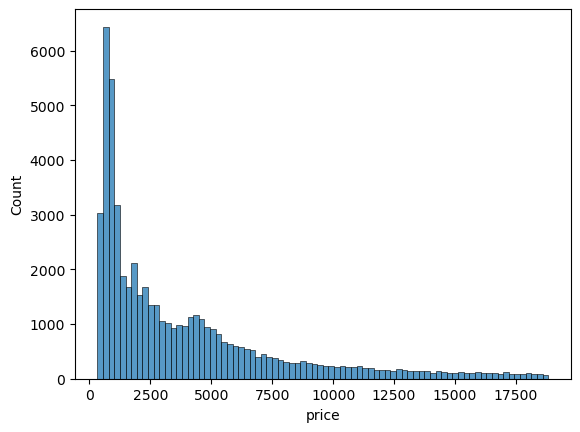

In [9]:
sns.histplot(diamonds.price)

# Exploring Diamod dataset from seaborn


In [10]:
 # pair plot for all numeric variables

# Preprocess the Data

In [11]:

# Features and target
X = diamonds.drop(columns=['price'])
y = diamonds['price']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

# Define transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit the preprocessor on training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

print(f"Preprocessed training data shape: {X_train_preprocessed.shape}")


Preprocessed training data shape: (43152, 26)


# Build a Regression Model with Keras

In [12]:

# Input dimension
input_dim = X_train_preprocessed.shape[1]

# Define the model
model = Sequential([
    Input(shape=(input_dim,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_preprocessed, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)


2025-03-17 16:01:55.026135: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Max
2025-03-17 16:01:55.026188: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 128.00 GB
2025-03-17 16:01:55.026195: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 48.00 GB
I0000 00:00:1742252515.026255  245476 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1742252515.026331  245476 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/50


2025-03-17 16:01:55.690545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1079/1079 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 19886776.0000 - mae: 2897.9487 - val_loss: 3170392.7500 - val_mae: 1400.2993
Epoch 2/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 3406781.0000 - mae: 1386.1202 - val_loss: 3074569.5000 - val_mae: 1329.4860
Epoch 3/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 3191351.0000 - mae: 1333.9896 - val_loss: 2773702.0000 - val_mae: 1263.5776
Epoch 4/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 2772610.0000 - mae: 1235.3668 - val_loss: 2394769.5000 - val_mae: 1148.1731
Epoch 5/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 2309979.0000 - mae: 1118.6584 - val_loss: 1931400.0000 - val_mae: 1010.3044
Epoch 6/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 1945166.3750 - mae: 1005.7845 - val_loss: 1658426.3750 - val_mae: 960.5471
Epoch 7/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 1651632.5000 - mae: 934.9761 - val_loss: 1542177.1250 - val_mae: 907.0309
Epoch 8/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 6s 5m

# Evaluate the Model

338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1376399.1250 - mae: 691.0406
Test Loss: 1386693.875, Test MAE: 690.0484619140625
338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step


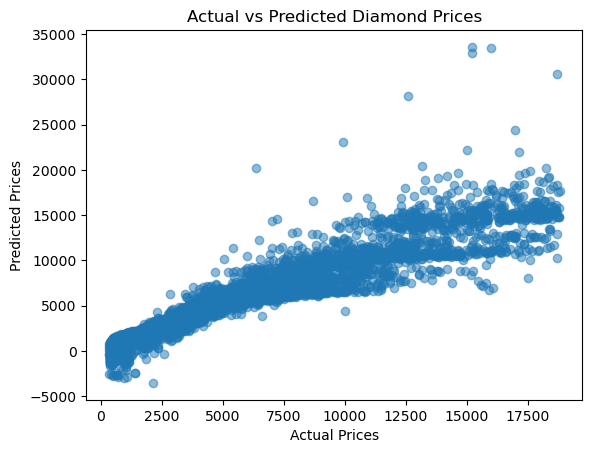

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test_preprocessed, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# Predict on test set
y_pred = model.predict(X_test_preprocessed)

# Visualize predictions vs actual values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Diamond Prices")
plt.show()
